<a href="https://colab.research.google.com/github/Chinthaka-Sharuna/Telco-Customer-Churn-Prediction-System/blob/main/Telco_Customer_Churn_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Read the Dataset

In [ ]:
data=pd.read_csv('/content/Telco Customer Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#rename tenure column to CustomerDuration
data.rename(columns={'tenure':'CustomerDuration'},inplace=True)
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'CustomerDuration', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [ ]:
data['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [ ]:
data.rename(columns={'SeniorCitizen':'IsSeniorCitizen'},inplace=True)

In [ ]:
data['Partner'].value_counts()
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'Partner', 'Dependents',
       'CustomerDuration', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.rename(columns={'Partner':'HasPartner'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner', 'Dependents',
       'CustomerDuration', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.rename(columns={'Dependents':'HasDependents'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
data['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [ ]:
data.rename(columns={'PhoneService':'HasPhoneService'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
data['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [ ]:
data.rename(columns={'MultipleLines':'HasMultipleLines'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [ ]:
data['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [ ]:
data.rename(columns={'OnlineSecurity':'HasOnlineSecurity'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [ ]:
data.rename(columns={'OnlineBackup':'HasOnlineBackup'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [ ]:
data.rename(columns={'DeviceProtection':'HasDeviceProtection'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['TechSupport'].value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [ ]:
data.rename(columns={'TechSupport':'HasTechSupport'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['StreamingTV'].value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [ ]:
data.rename(columns={'StreamingTV':'HasStreamingTV'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'HasStreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [ ]:
data.rename(columns={'StreamingMovies':'HasStreamingMovies'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'HasStreamingTV', 'HasStreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [ ]:
data['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [ ]:
data['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


In [ ]:
data.rename(columns={'PaperlessBilling':'IsPaperlessBilling'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'HasStreamingTV', 'HasStreamingMovies', 'Contract',
       'IsPaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
mask=data['customerID'].duplicated()
data[mask]

,customerID,gender,IsSeniorCitizen,HasPartner,HasDependents,CustomerDuration,HasPhoneService,HasMultipleLines,InternetService,HasOnlineSecurity,...,HasDeviceProtection,HasTechSupport,HasStreamingTV,HasStreamingMovies,Contract,IsPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
#change the data type in TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
#replace NA value with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [ ]:
#fix the values in TotalCharges
calculated_charge = data['MonthlyCharges'] * data['CustomerDuration']

# Use np.where(condition, value_if_true, value_if_false)
# Logic: If (Total <= Calculated), keep Total. Else, use Calculated.
data['TotalCharges'] = np.where(
    data['TotalCharges'] - calculated_charge <= 0,
    data['TotalCharges'],
    calculated_charge
)

In [ ]:
data.drop(columns=['customerID'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7043 non-null   object 
 1   IsSeniorCitizen      7043 non-null   int64  
 2   HasPartner           7043 non-null   object 
 3   HasDependents        7043 non-null   object 
 4   CustomerDuration     7043 non-null   int64  
 5   HasPhoneService      7043 non-null   object 
 6   HasMultipleLines     7043 non-null   object 
 7   InternetService      7043 non-null   object 
 8   HasOnlineSecurity    7043 non-null   object 
 9   HasOnlineBackup      7043 non-null   object 
 10  HasDeviceProtection  7043 non-null   object 
 11  HasTechSupport       7043 non-null   object 
 12  HasStreamingTV       7043 non-null   object 
 13  HasStreamingMovies   7043 non-null   object 
 14  Contract             7043 non-null   object 
 15  IsPaperlessBilling   7043 non-null   o

In [ ]:
data['Churn'].size

7043

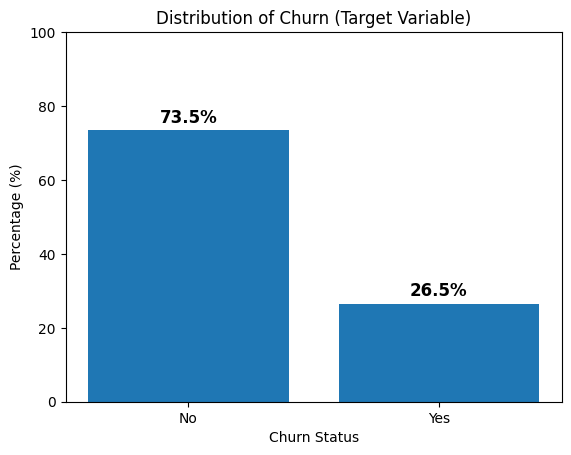

In [ ]:
count=data['Churn'].value_counts()
percentages = (count.values / len(data)) * 100
bars=plt.bar(count.index,percentages,align='center')
plt.title('Distribution of Churn (Target Variable)')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             f'{yval:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.ylabel('Percentage (%)')
plt.xlabel('Churn Status')
plt.show()

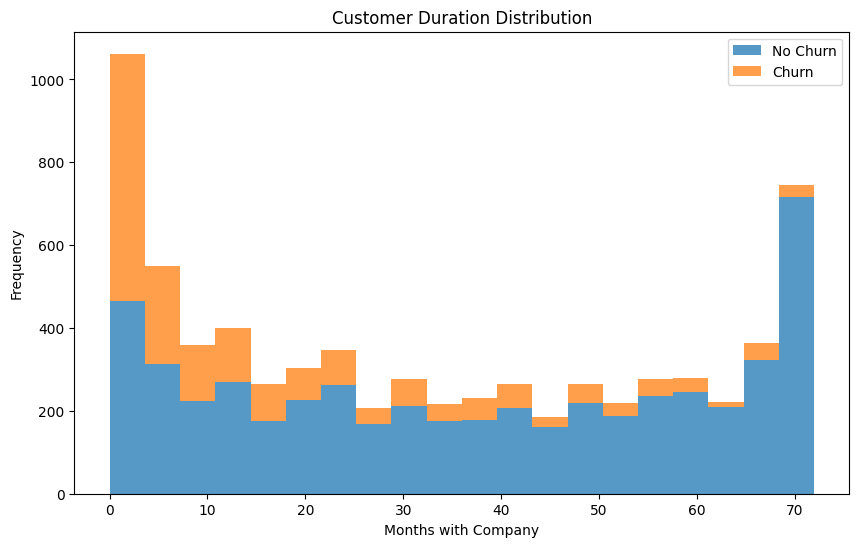

In [ ]:
churn_yes = data[data['Churn'] == 'Yes']['CustomerDuration']
churn_no = data[data['Churn'] == 'No']['CustomerDuration']
# Plot histogram with two datasets
plt.figure(figsize=(10, 6))
plt.hist([churn_no, churn_yes], bins=20, label=['No Churn', 'Churn'],
         color=['#1f77b4', '#ff7f0e'], alpha=0.75, stacked=True)
plt.title('Customer Duration Distribution')
plt.xlabel('Months with Company')
plt.ylabel('Frequency')
plt.legend()
plt.show()


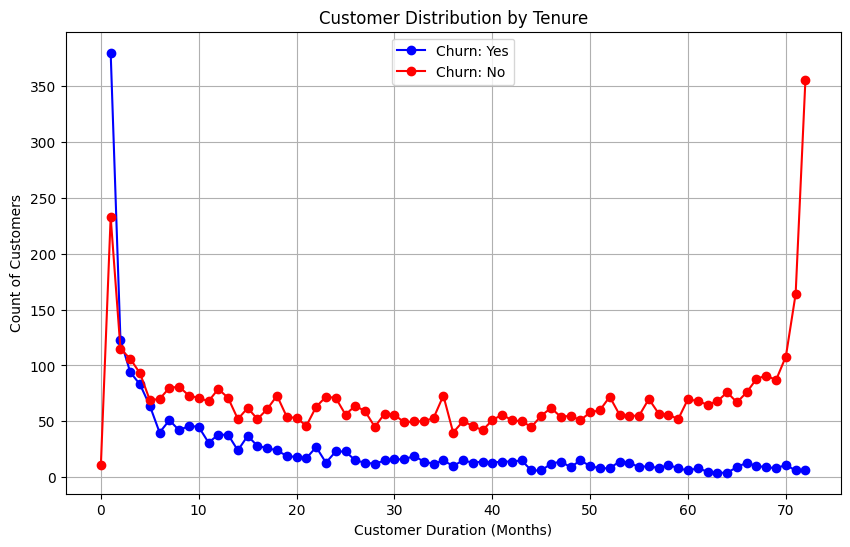

In [ ]:
churned_yes_data = data[data['Churn'] == 'Yes']
duration_counts_yes = churned_yes_data['CustomerDuration'].value_counts().sort_index()

churned_no_data = data[data['Churn'] == 'No']
duration_counts_no = churned_no_data['CustomerDuration'].value_counts().sort_index()

# 2. Create the Line Chart
plt.figure(figsize=(10, 6))
plt.plot(duration_counts_yes.index, duration_counts_yes.values, marker='o', linestyle='-', color='blue',label='Churn: Yes')
plt.plot(duration_counts_no.index, duration_counts_no.values, marker='o', linestyle='-', color='red',label='Churn: No')

# 3. Formatting
plt.title('Customer Distribution by Tenure')
plt.xlabel('Customer Duration (Months)')
plt.ylabel('Count of Customers')
plt.grid(True)
plt.legend()
plt.show()

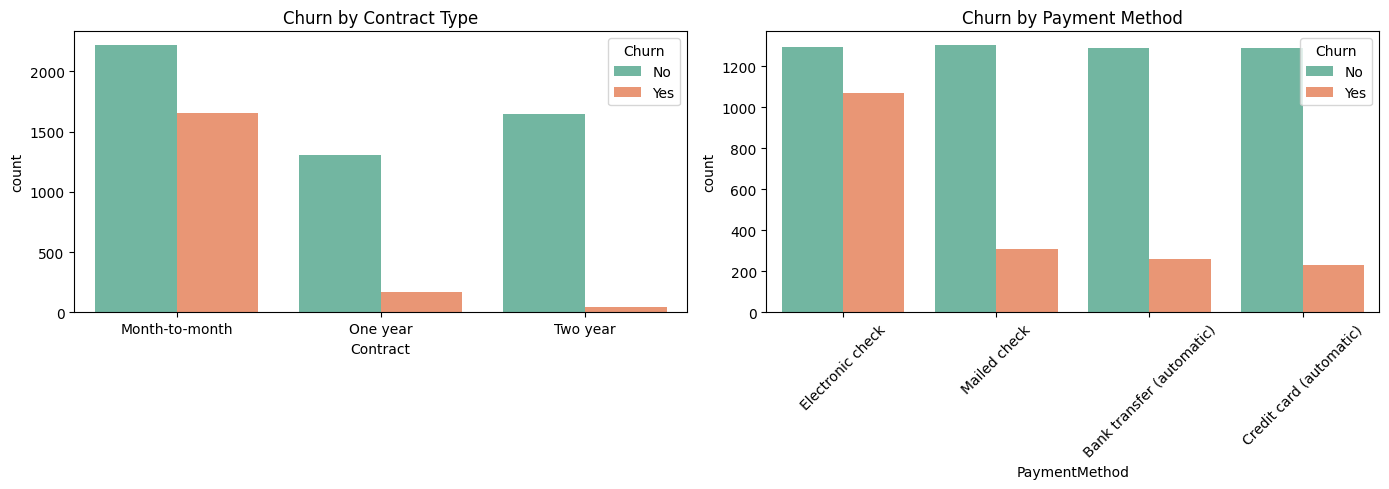

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graph 1: Contract Type
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2', ax=axes[0])
axes[0].set_title('Churn by Contract Type')

# Graph 2: Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2', ax=axes[1])
axes[1].set_title('Churn by Payment Method')
axes[1].tick_params(axis='x', rotation=45) # Rotate labels to fit

plt.tight_layout()
plt.show()

In [ ]:
df_copy=data.copy()
df_copy['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


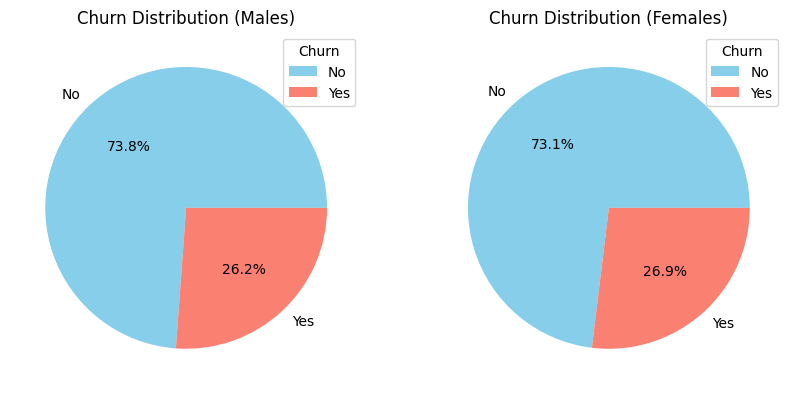

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

male_churn = data[data['gender'] == 'Male']['Churn'].value_counts()

female_churn = data[data['gender'] == 'Female']['Churn'].value_counts()

axes[0].pie(male_churn, labels=male_churn.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('Churn Distribution (Males)')
axes[0].legend(title='Churn', loc='upper right')

axes[1].pie(female_churn, labels=female_churn.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Churn Distribution (Females)')
axes[1].legend(title='Churn', loc='upper right')


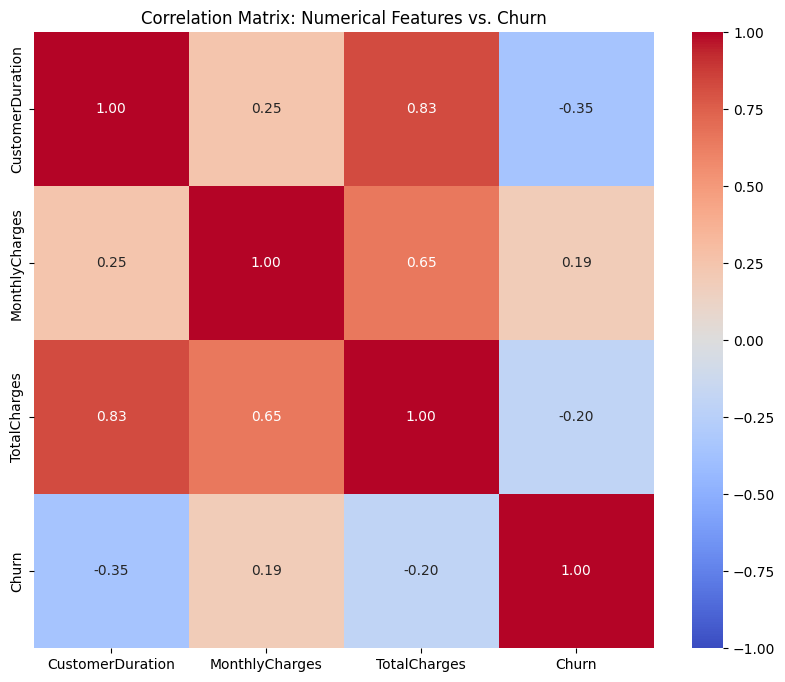

In [ ]:
# Create a copy for correlation to avoid modifying the main data
df_corr = data.copy()
# 1. Convert Churn to numbers (Yes=1, No=0) so it appears in the matrix
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# 2. Select only numerical columns
numeric_cols = ['CustomerDuration', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df_corr[numeric_cols].corr()

# 3. Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Numerical Features vs. Churn')
plt.show()

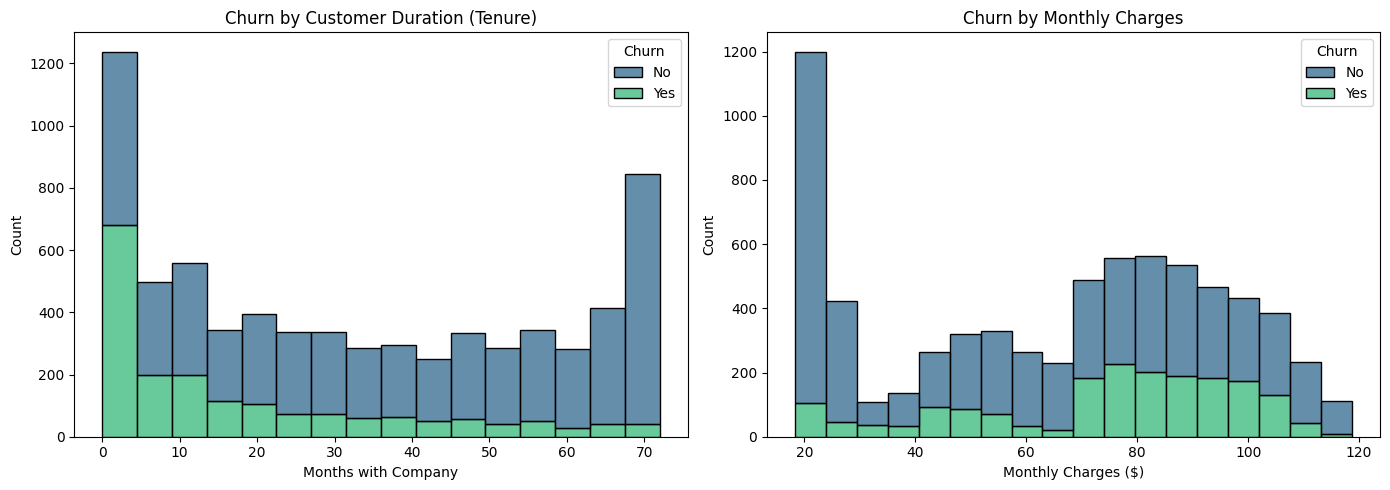

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graph 1: Customer Duration vs Churn
sns.histplot(data=data, x='CustomerDuration', hue='Churn', multiple='stack', palette='viridis', ax=axes[0])
axes[0].set_title('Churn by Customer Duration (Tenure)')
axes[0].set_xlabel('Months with Company')

# Graph 2: Monthly Charges vs Churn
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', palette='viridis', ax=axes[1])
axes[1].set_title('Churn by Monthly Charges')
axes[1].set_xlabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [ ]:
# 1. Create a copy of the dataframe for modeling
df_model = data.copy()

# 2. Convert Binary Columns (Yes/No) to 0/1
# loop through columns to find those with only 2 values
le = LabelEncoder()
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        if len(df_model[col].unique()) <= 2:
            df_model[col] = le.fit_transform(df_model[col])

# 3. Convert Remaining Categorical Columns
df_model = pd.get_dummies(df_model, drop_first=True)

# 4. Scale the Numerical Columns (Crucial for Neural Networks)
scaler = MinMaxScaler()
cols_to_scale = ['CustomerDuration', 'MonthlyCharges', 'TotalCharges']
df_model[cols_to_scale] = scaler.fit_transform(df_model[cols_to_scale])

# 5. Split into X (Features) and y (Target)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# 6. Split into Train and Test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Prepared.")
print(f"Features ready: {X_train.shape[1]}")

Data Prepared.
Features ready: 30


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Define the Model Architecture
model = Sequential([
    # Input Layer & Hidden Layer 1
    # 'units=16': 16 neurons to learn features
    # 'activation=relu': Standard function for hidden layers
    Dense(16, activation='relu'),

    # Hidden Layer 1
    Dense(8, activation='relu'),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# 2. Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Critical for Yes/No classification
              metrics=['accuracy'])

# 3. Train the Model
# 'epochs=50': Passes through the data 50 times
# 'validation_split=0.2':
print("Starting Training...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 4. Evaluate on Test Data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

Starting Training...
Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6831 - loss: 0.6058 - val_accuracy: 0.7808 - val_loss: 0.4532
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.4568 - val_accuracy: 0.7950 - val_loss: 0.4307
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.4386 - val_accuracy: 0.8066 - val_loss: 0.4234
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: 0.4275 - val_accuracy: 0.8048 - val_loss: 0.4192
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8014 - loss: 0.4211 - val_accuracy: 0.8012 - val_loss: 0.4162
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4325 - val_accuracy: 0.8030 - val_loss: 0.4168
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7980 - loss: 0.4295 - val_accuracy: 0.8039 - val_loss: 0.4138
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7849 - loss: 0.4

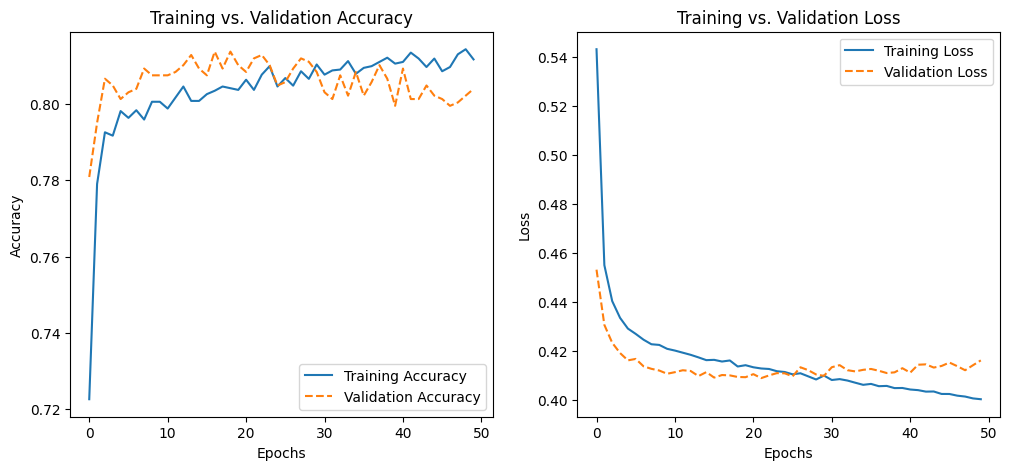

In [ ]:
# 1. Capture the history from your training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# 2. Create the plots
plt.figure(figsize=(12, 5))

# --- Graph 1: Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle='--')
plt.title('Training vs. Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# --- Graph 2: Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='--')
plt.title('Training vs. Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Training Tuned Model...
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


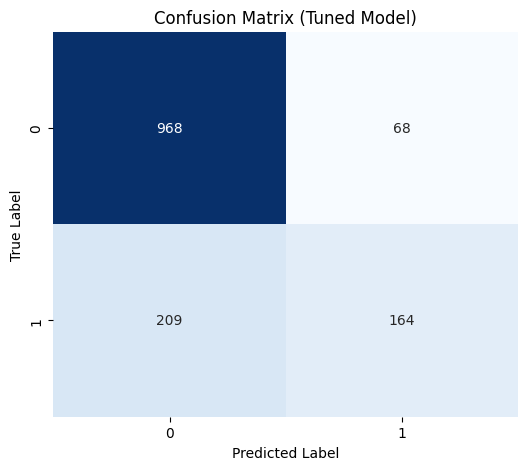


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.71      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix

# 1. Build the Tuned Model
model_tuned = Sequential([
    Dense(16, activation='relu'),
    Dropout(0.5),  # Drops 50% of neurons to prevent overfitting

    Dense(8, activation='relu'),
    Dropout(0.5),  # Drops 50% of neurons

    Dense(1, activation='sigmoid')
])

model_tuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 2. Train the Tuned Model
print("Training Tuned Model...")
history_tuned = model_tuned.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# 3. Predict on Test Data
y_pred_prob = model_tuned.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probability to 0 or 1

# 4. Generate Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5. Print Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# 1. Initialize the Decision Tree Classifier
# 'random_state=42': Ensures reproducibility (same result every time)
# 'max_depth=5': Limits tree depth to prevent overfitting (a form of tuning)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# 2. Train the Model
print("Training Decision Tree...")
dt_model.fit(X_train, y_train)

# 3. Predict on Test Data
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluation
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("-" * 30)
print("DECISION TREE RESULTS")
print("-" * 30)
print(f"Accuracy: {dt_acc * 100:.2f}%")
print(f"F1 Score: {dt_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# 5. Compare with Neural Network (NN)
# Assuming you ran the NN code previously and have y_pred from it
# (If you re-ran the notebook, make sure y_pred from the NN step is available)
try:
    nn_acc = accuracy_score(y_test, y_pred) # y_pred from the NN step
    print("-" * 30)
    print("MODEL COMPARISON")
    print("-" * 30)
    print(f"Neural Network Accuracy: {nn_acc * 100:.2f}%")
    print(f"Decision Tree Accuracy:  {dt_acc * 100:.2f}%")

    if nn_acc > dt_acc:
        print("\nConclusion: The Neural Network performed better.")
    else:
        print("\nConclusion: The Decision Tree performed better (or similar).")
except NameError:
    print("\n(Could not find Neural Network predictions to compare automatically. Check your previous cells.)")

Training Decision Tree...
------------------------------
DECISION TREE RESULTS
------------------------------
Accuracy: 80.77%
F1 Score: 0.5593

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.71      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409

------------------------------
MODEL COMPARISON
------------------------------
Neural Network Accuracy: 80.34%
Decision Tree Accuracy:  80.77%

Conclusion: The Decision Tree performed better (or similar).


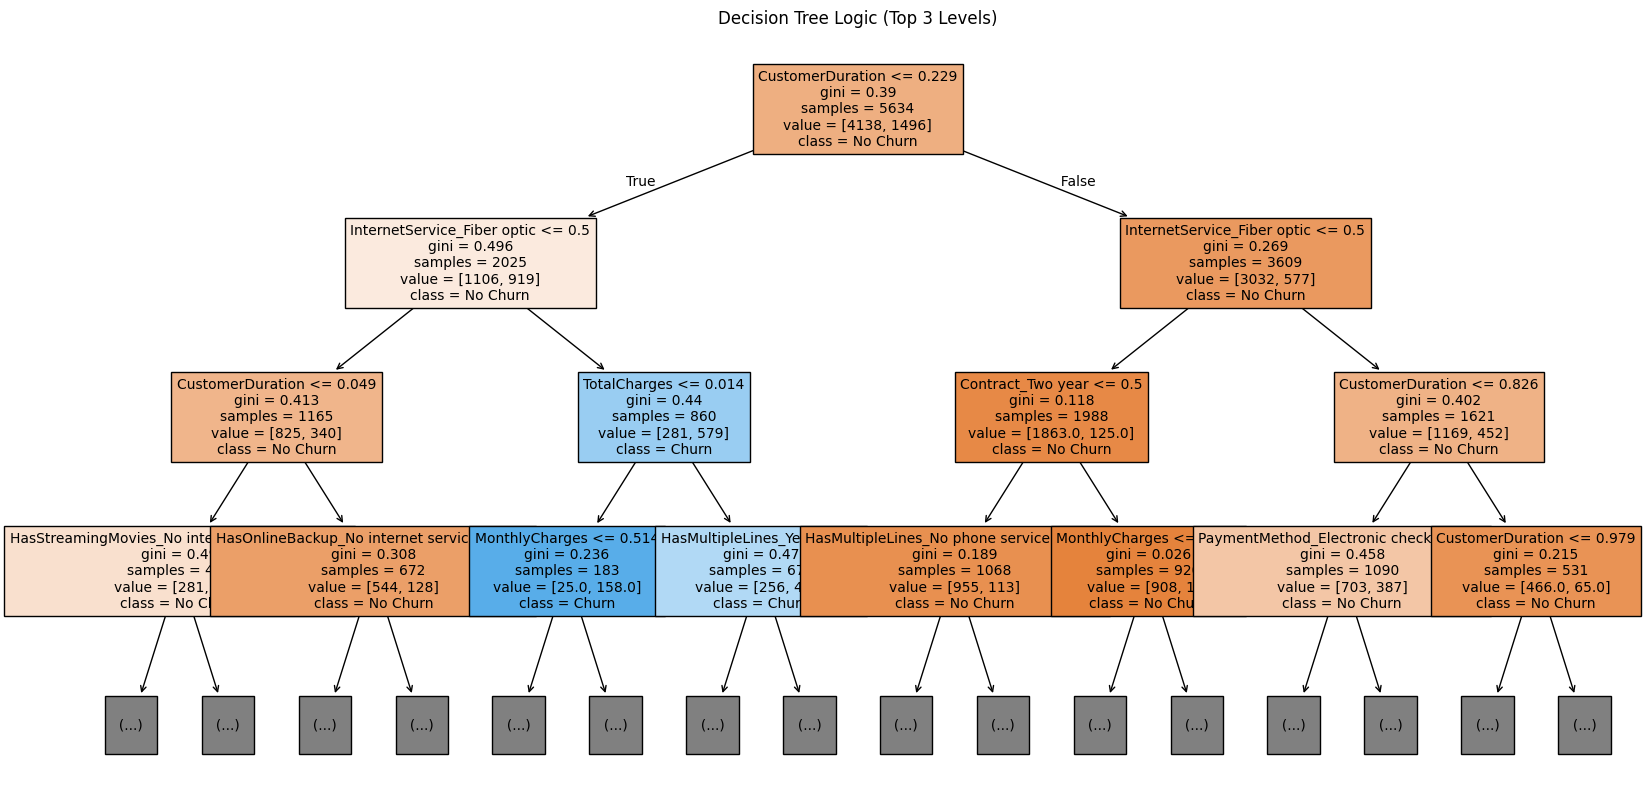

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          fontsize=10,
          max_depth=3) # Limit depth just for plotting clarity
plt.title("Decision Tree Logic (Top 3 Levels)")
plt.show()